Erstmal importieren

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Dann die csv einlesen

In [3]:
(height,weight)= np.genfromtxt("height_weight.csv",delimiter=",", unpack=True)

In [4]:
print(weight)

[ 77.13  86.63  77.    92.38  92.13 105.13  90.5   88.    95.5   99.13
  93.13 108.    90.25 102.63  93.88  81.38  97.88 104.63  91.88 105.88
  89.5  100.25  70.13  74.38  75.63  79.63  65.75  74.    66.63  80.38
  91.    80.13  84.   109.25 123.63  95.88 101.13  98.38 181.58 101.5
 131.38 108.5  106.    62.63  82.13  66.75  74.25  67.88  63.75  79.13
  69.63  68.63  76.38  68.13  99.    90.75 100.63 101.25  89.88 108.
  89.38  96.63  89.   102.75  91.75  75.75  77.38  77.63  78.38  83.75
  73.38  80.38  62.5   71.5   74.13  81.25  88.88  80.63  85.63  81.88
  75.13  95.13  85.38  84.    83.5   78.88  80.    88.38  88.    88.5
  89.88  82.63  96.25  92.13 112.25  94.38  81.25  78.25  98.5   99.25
  86.88  86.38  98.38  88.5   82.75 100.13 101.63  97.    84.25  85.38
  91.63  89.13  81.5   87.63  79.    88.63  89.5   95.5   93.75 103.25
  92.63  80.13  75.75  80.5   83.5   88.75  76.13  96.13  82.63  85.88
  85.63  98.5   78.5   84.13  93.    83.38  93.88  84.13 106.38  88.38
  86.63  8

Histogramme erstellen:
1. Height
2. Weight

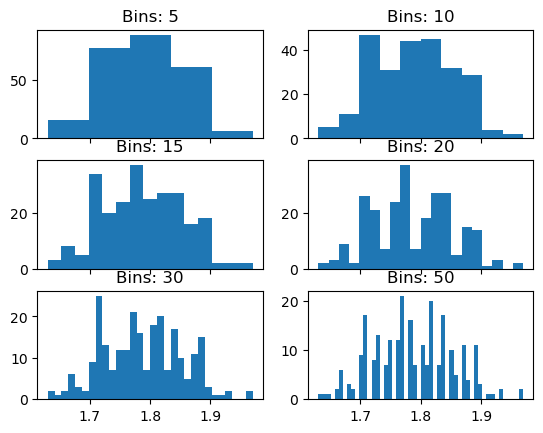

In [5]:
fig, ax = plt.subplots(3,2,sharex=True)
bins_sizes=[5,10,15,20,30,50]
for k, bins in enumerate(bins_sizes):
    row, col=divmod(k,2)
    ax[row,col].hist(height, bins=bins)
    ax[row, col].set_title(f"Bins: {bins}")


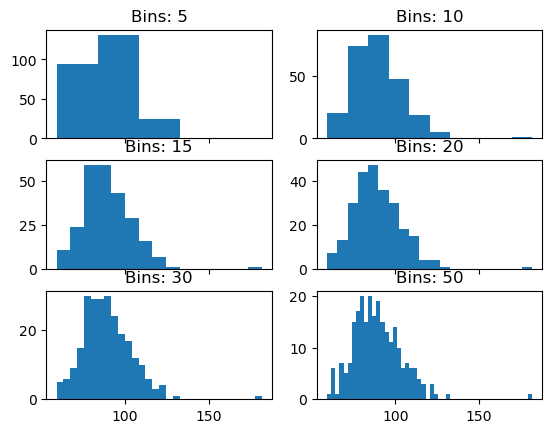

In [6]:
fig, ax = plt.subplots(3,2,sharex=True)
bins_sizes=[5,10,15,20,30,50]
for k, bins in enumerate(bins_sizes):
    row, col=divmod(k,2)
    ax[row,col].hist(weight, bins=bins)
    ax[row, col].set_title(f"Bins: {bins}")

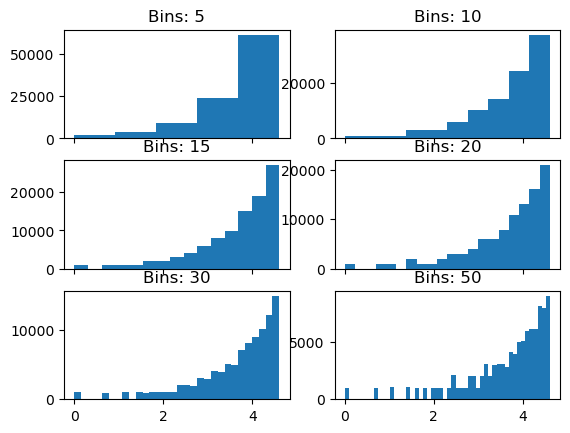

In [7]:
from numpy.random import default_rng

rg=np.random.default_rng(42)
numbers=rg.integers(1,101,10**5)
log_nums=np.log(numbers)

fig, ax = plt.subplots(3,2,sharex=True)
bins_sizes=[5,10,15,20,30,50]
for k, bins in enumerate(bins_sizes):
    row, col=divmod(k,2)
    ax[row,col].hist(log_nums, bins=bins)
    ax[row, col].set_title(f"Bins: {bins}")
  



## Aufgabe 2:


<ErrorbarContainer object of 3 artists>

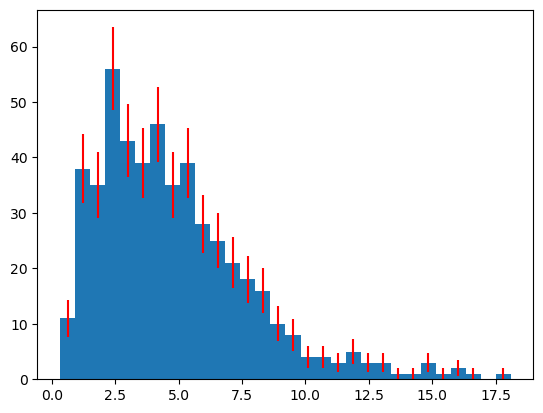

In [8]:
from scipy.stats import chi2

#set random seed for reproductibility
np.random.seed(0)

#(a) generate 500 random numbers from a chi2 distribution with 5 degrees of freedom
nums=np.random.chisquare(df=5, size=500)

#(b) create 1d histogram with error bars
# its common to use the square root of the number of samples -> for 500 its 22,5 so i choose 30 
bin_count=30
fig, ax=plt.subplots()
N,bins,_=ax.hist(nums, bin_count)
centers=bins[:-1]+np.diff(bins)/2
ax.errorbar(centers, N, yerr=np.sqrt(N), fmt='None', ecolor='red')

c) Plot the histogram and the true density scipy.stats.chi2.pdf of the distribution appropriately

In [9]:
from scipy import stats
x=np.linspace(np.min(nums), np.max(nums),1000)
pdf=stats.chi2.pdf(x=x, df=5)

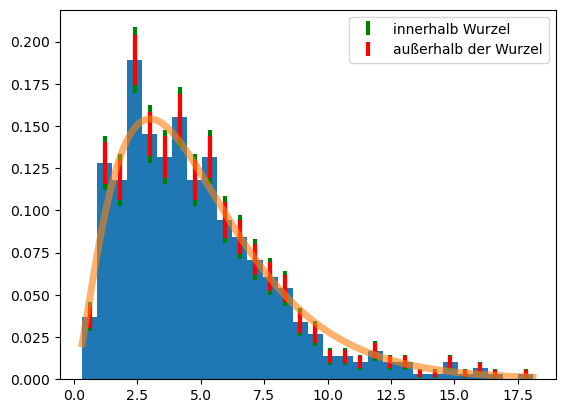

In [10]:
N_normal, bins,_=plt.hist(nums, bins=30, density=True)

plt.errorbar(centers, N_normal, yerr=np.sqrt(N_normal/nums.size), fmt='None', elinewidth=3,ecolor='green', label='innerhalb Wurzel')
plt.errorbar(centers,N_normal,yerr=np.sqrt(N)/nums.size,fmt='None', elinewidth=3,ecolor='red', label='außerhalb der Wurzel')

plt.plot(x,pdf,lw=5, alpha=0.6)
plt.legend()

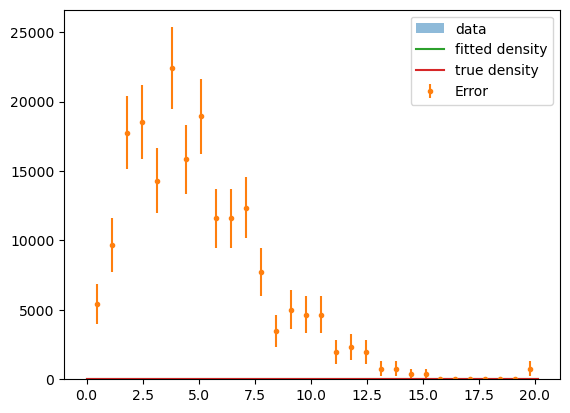

In [19]:
#generate 500 rv from a chi2 distribution
nums=np.random.chisquare(df=5, size=500)

#create histogram with errorbars
bin_count=30
entries, bin_edges, _=plt.hist(nums, bins=bin_count, label='data', alpha=0.5)
bin_centers=0.5*(bin_edges[1:]+bin_edges[:-1])
errors=np.sqrt(entries)

#normalize histogram
volume=np.prod([abs(b-a) for a,b in zip(bin_edges[:-1], bin_edges[1:])])
entries_normalized=entries/(volume*sum(entries))

#true density
x=np.linspace(0, np.max(nums),500)
true_density=stats.chi2.pdf(x, df=5)

#fit to the sample
params=chi2.fit(nums, floc=0)

#fitted density
fitted_density=stats.chi2.pdf(x, df=params[0], loc=params[1], scale=params[2])

#plot 
plt.errorbar(bin_centers, entries_normalized, yerr=errors/(volume*sum(entries)), fmt='.', label='Error')
plt.plot(x,fitted_density, label='fitted density')
plt.plot(x, true_density, label='true density')
plt.legend()